In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Flight price.xlsx")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.shape

(10683, 11)

In [5]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [6]:
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data = data.astype({"Date_of_Journey":"datetime64","Dep_Time":"datetime64","Arrival_Time":"datetime64"})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [11]:
flight = data.groupby(['Source','Destination'])['Source'].count()
pd.DataFrame(flight)

Source
Source   Destination        
Banglore Delhi          1265
         New Delhi       932
Chennai  Kolkata         381
Delhi    Cochin         4537
Kolkata  Banglore       2871
Mumbai   Hyderabad       697

In [12]:
data['Destination'].value_counts() 

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
data['Source'].value_counts() 

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [14]:
source = data.groupby(['Source'])['Source'].count()
pd.DataFrame(source)

,Source
Source,
Banglore,2197
Chennai,381
Delhi,4537
Kolkata,2871
Mumbai,697


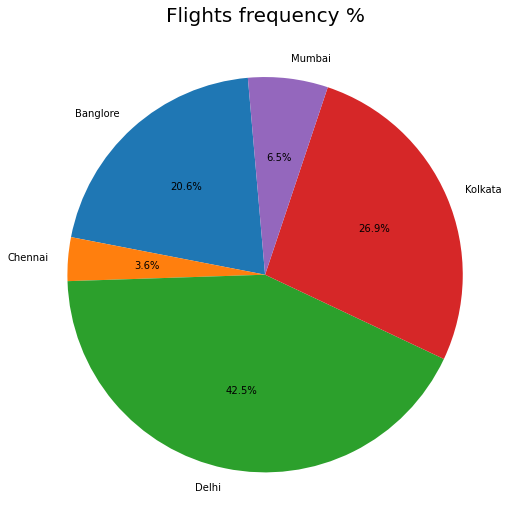

In [15]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(source, labeldistance=1.1, labels=source.index, startangle=95, autopct = '%1.1f%%')
ax.set_title("Flights frequency %", fontsize=20);

In [16]:
routes = data['Route'].value_counts()
pd.DataFrame(routes)

,Route
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
BLR → CCU → BBI → HYD → VGA → DEL,1
BLR → HBX → BOM → NAG → DEL,1
BOM → VNS → DEL → HYD,1
BOM → COK → MAA → HYD,1


In [17]:
rd = data.groupby(['Airline','Route','Duration'])['Price'].min()
pd.DataFrame(rd)

Price
Airline                 Route           Duration       
Air Asia                BLR → DEL       2h 45m     3383
                                        2h 50m     3383
                        CCU → BBI → BLR 3h 35m     5162
                                        3h 40m     5162
                        CCU → BLR       2h 30m     3782
...                                                 ...
Vistara                 MAA → CCU       2h 15m     3687
                                        2h 20m    11982
Vistara Premium economy BLR → DEL       2h 35m    11793
                                        2h 50m     5969
                        MAA → CCU       2h 15m     9125

[1210 rows x 1 columns]

In [18]:
r_price = data.groupby(['Airline','Route'])['Price'].value_counts()
pd.DataFrame(r_price)

Price
Airline                 Route     Price       
Air Asia                BLR → DEL 3383      31
                                  4483      19
                                  4282      17
                                  7120       4
                                  4284       3
...                                        ...
Vistara                 MAA → CCU 5944       1
                                  7414       1
Vistara Premium economy BLR → DEL 5969       1
                                  11793      1
                        MAA → CCU 9125       1

[2091 rows x 1 columns]

In [19]:
min_price = data.groupby(['Airline','Route'])['Price'].min()
pd.DataFrame(min_price)

Price
Airline                 Route                       
Air Asia                BLR → DEL               3383
                        CCU → BBI → BLR         5162
                        CCU → BLR               3782
                        CCU → DEL → BLR         5192
                        CCU → IXR → DEL → BLR   5192
...                                              ...
Vistara                 CCU → DEL → BLR         7770
                        DEL → COK               4851
                        MAA → CCU               3687
Vistara Premium economy BLR → DEL               5969
                        MAA → CCU               9125

[209 rows x 1 columns]

In [20]:
dates = data.groupby(['Date_of_Journey'])['Date_of_Journey'].count()
pd.DataFrame(dates)

,Date_of_Journey
Date_of_Journey,
2019-01-03,199
2019-01-04,257
2019-01-05,277
2019-01-06,342
2019-03-03,315
2019-03-04,110
2019-03-05,90
2019-03-06,333
2019-03-15,162


<AxesSubplot:title={'center':'Flights frequency across 2019'}, xlabel='Date_of_Journey'>

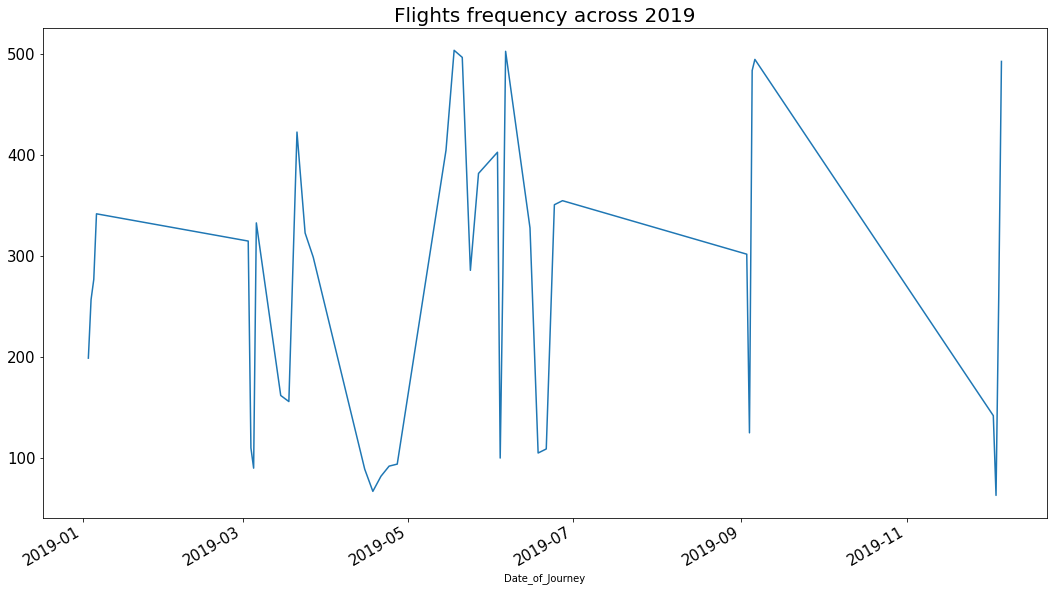

In [21]:
fig = plt.figure(figsize=[18, 10])
ft = fig.add_subplot(111)
ft.set_facecolor('white')
ft.set_title("Flights frequency across 2019", fontsize=20);
dates.plot(legend=False, fontsize=15)

In [22]:
airlines = data.groupby('Airline')['Airline'].count()
pd.DataFrame(airlines)

,Airline
Airline,
Air Asia,319
Air India,1752
GoAir,194
IndiGo,2053
Jet Airways,3849
Jet Airways Business,6
Multiple carriers,1196
Multiple carriers Premium economy,13
SpiceJet,818


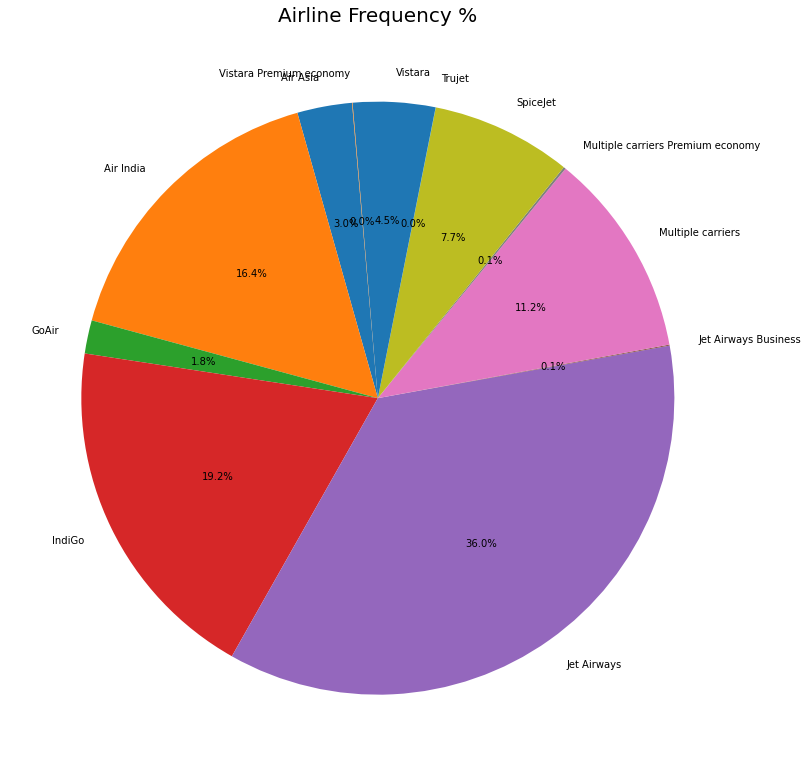

In [23]:
fig = plt.figure(figsize=[30, 30])
air = fig.add_subplot(224)
plt.pie(airlines, labeldistance=1.1, labels=airlines.index, startangle=95, autopct = '%1.1f%%')
air.set_title("Airline Frequency %", fontsize=20);

In [24]:
jet = data.loc[(data['Source'] == 'Banglore') & (data['Total_Stops']== 'non-stop') & (data['Airline']== 'Jet Airways')]
jet

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
81,Jet Airways,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-04 19:55:00,2021-10-04 22:35:00,2h 40m,non-stop,No info,7229
97,Jet Airways,2019-03-06,Banglore,Delhi,BLR → DEL,2021-10-04 19:50:00,2021-10-04 22:50:00,3h,non-stop,In-flight meal not included,6478
138,Jet Airways,2019-05-24,Banglore,Delhi,BLR → DEL,2021-10-04 06:00:00,2021-10-04 08:45:00,2h 45m,non-stop,In-flight meal not included,4030
193,Jet Airways,2019-06-27,Banglore,Delhi,BLR → DEL,2021-10-04 18:55:00,2021-10-04 22:00:00,3h 5m,non-stop,No info,8016
205,Jet Airways,2019-04-18,Banglore,Delhi,BLR → DEL,2021-10-04 15:15:00,2021-10-04 18:10:00,2h 55m,non-stop,No info,7229
...,...,...,...,...,...,...,...,...,...,...,...
10613,Jet Airways,2019-03-06,Banglore,Delhi,BLR → DEL,2021-10-04 18:55:00,2021-10-04 22:00:00,3h 5m,non-stop,No info,8016
10615,Jet Airways,2019-01-04,Banglore,Delhi,BLR → DEL,2021-10-04 15:15:00,2021-10-04 18:10:00,2h 55m,non-stop,No info,7229
10637,Jet Airways,2019-04-24,Banglore,Delhi,BLR → DEL,2021-10-04 18:55:00,2021-10-04 22:00:00,3h 5m,non-stop,No info,7229
10658,Jet Airways,2019-06-18,Banglore,Delhi,BLR → DEL,2021-10-04 11:10:00,2021-10-04 14:05:00,2h 55m,non-stop,In-flight meal not included,5769


In [25]:
date = data.loc[(data['Date_of_Journey']== '2019-03-06') & (data['Destination'] == 'Banglore')]
date


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
188,IndiGo,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 15:30:00,2021-10-04 18:05:00,2h 35m,non-stop,No info,4804
983,Air India,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 14:15:00,2021-10-04 16:45:00,2h 30m,non-stop,No info,5510
2160,IndiGo,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 22:15:00,2021-06-04 00:50:00,2h 35m,non-stop,No info,4804
2516,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 17:10:00,2021-10-04 19:40:00,2h 30m,non-stop,No info,3873
3796,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 06:55:00,2021-10-04 09:30:00,2h 35m,non-stop,No info,3873
4068,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 22:20:00,2021-06-04 00:40:00,2h 20m,non-stop,No check-in baggage included,3841
5494,IndiGo,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 04:40:00,2021-10-04 07:15:00,2h 35m,non-stop,No info,5224
5552,IndiGo,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 15:15:00,2021-10-04 17:45:00,2h 30m,non-stop,No info,4804
5669,IndiGo,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 20:25:00,2021-10-04 23:10:00,2h 45m,non-stop,No info,4804
5770,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 17:10:00,2021-10-04 19:40:00,2h 30m,non-stop,No check-in baggage included,3841


In [26]:
min_price = date.loc[(date['Price']<= 4000)]
min_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2516,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 17:10:00,2021-10-04 19:40:00,2h 30m,non-stop,No info,3873
3796,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 06:55:00,2021-10-04 09:30:00,2h 35m,non-stop,No info,3873
4068,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 22:20:00,2021-06-04 00:40:00,2h 20m,non-stop,No check-in baggage included,3841
5770,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 17:10:00,2021-10-04 19:40:00,2h 30m,non-stop,No check-in baggage included,3841
5971,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 06:55:00,2021-10-04 09:30:00,2h 35m,non-stop,No check-in baggage included,3841
9983,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 09:00:00,2021-10-04 11:25:00,2h 25m,non-stop,No info,3873
10569,SpiceJet,2019-03-06,Kolkata,Banglore,CCU → BLR,2021-10-04 22:20:00,2021-06-04 00:40:00,2h 20m,non-stop,No info,3873


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF PRICES')

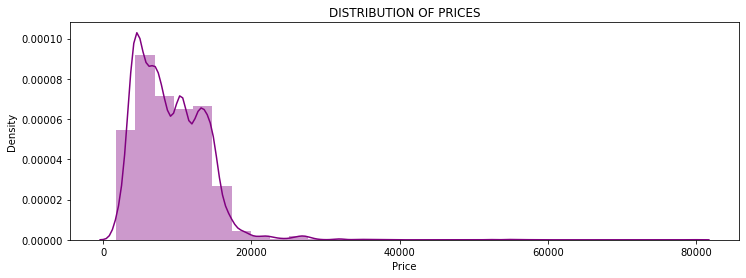

In [27]:
plt.figure(figsize=(12,4))
sns.distplot(data['Price'],bins=30,color='purple')
plt.title("DISTRIBUTION OF PRICES")